In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Dataset
df=pd.read_csv("data_Proj_2.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#Basic Operations 

In [4]:
#shape
df.shape

(13611, 17)

In [5]:
#size
df.size

231387

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
#Check for null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
#Converting target column into numeric
# We'll use dictionary encoding
Class_dict={"DERMASON":0,"SIRA":1,"SEKER":2,"HOROZ":3,"CALI":4,"BARBUNYA":5,"BOMBAY":6}
df["Class_enc"]=df.Class.map(Class_dict)

In [9]:
df1=df.drop(["Class"],axis=1)

<Axes: >

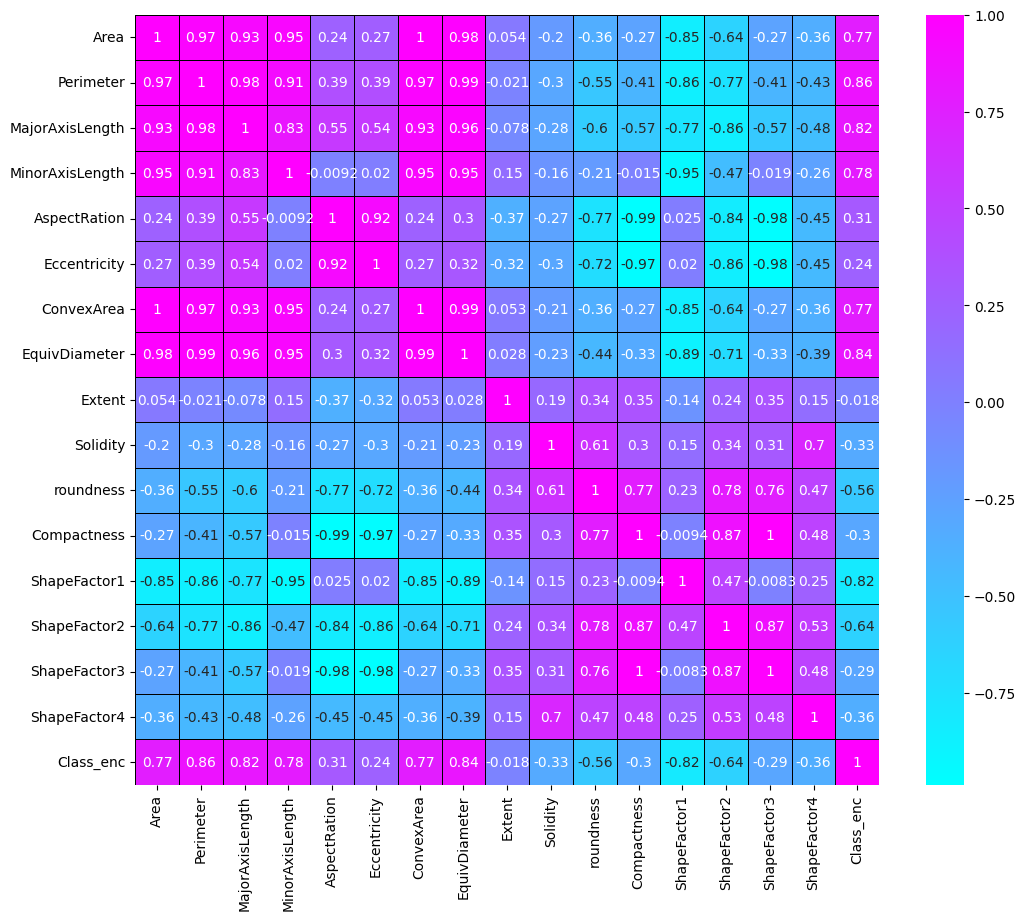

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,cmap="cool",linewidths=0.7,linecolor="black")

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df1.iloc[:, :-1])
df1=pd.DataFrame(data_scaled,columns=df1.columns[:-1])
df1.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


In [12]:
X=df1
y=df["Class_enc"]

In [13]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (13611, 16)
y Shape:  (13611,)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (10888, 16)
X_test:  (2723, 16)
y_train:  (10888,)
y_test:  (2723,)


### 1.Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#Accuracy On training set
print("Accuracy on training : ",lr.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",lr.score(X_test,y_test))

Accuracy on training :  0.9171565025716385
Accuracy on testing :  0.9203084832904884


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[602  58  11   0   0   0   0]
 [ 41 479   8   7   0   1   0]
 [ 13  10 385   0   0   5   0]
 [  4   8   0 391   5   0   0]
 [  0   5   0   4 299   9   0]
 [  0  10   2   1  15 233   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9203084832904884
recall:  0.9203084832904884
Precison:  0.9203084832904884
F1-score:  0.9203084832904884
Specifity:  0.9121212121212121


### 2.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
#Accuracy On training set
print("Accuracy on training : ",dt.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",dt.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.8920308483290489


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=dt.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[589  62  14   5   0   1   0]
 [ 53 453  13  12   3   2   0]
 [ 21  13 377   0   0   2   0]
 [  3  10   0 378  12   5   0]
 [  0   2   0   5 286  24   0]
 [  0   8   2   1  21 229   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.8920308483290489
recall:  0.8920308483290489
Precison:  0.8920308483290489
F1-score:  0.8920308483290489
Specifity:  0.9047619047619048


### 3.Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
#Accuracy On training set
print("Accuracy on training : ",rf.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",rf.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.9243481454278369
